In [1]:
import time
import matplotlib.pyplot as plt

import os
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # Force TF to use only the CPU

import sys
print(sys.version)

import numpy as np
print(np.__version__)

import tensorflow as tf
print(tf.__version__)
print(tf.keras.__version__)

# assert tf.test.is_gpu_available() # raises error if gpu is not available
# assert tf.test.is_built_with_cuda()
# print("tf.test.is_built_with_cuda():", tf.test.is_built_with_cuda())
# print("list_physical_devices('GPU'):", tf.config.list_physical_devices('GPU'))

# if tf.test.gpu_device_name():
#     print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))
# else:
#     print("GPU installation is not available for TF")

import keras
print(keras.__version__)

3.6.10 |Anaconda, Inc.| (default, May  7 2020, 19:46:08) [MSC v.1916 64 bit (AMD64)]
1.19.5


2.2.2
2.3.0-tf
2.3.0


Using TensorFlow backend.


In [2]:
# keras functions
from keras.utils import to_categorical

from keras import layers
from keras import models

from keras.utils.vis_utils import plot_model
# from tensorflow.keras.utils import plot_model

# instantiating a small convnet
- a convnet takes as input tensors of shape (image_height, image_width, image_channels) (not including the batch dimension)
- In this case, we’ll configure the convnet to process inputs of size (28, 28, 1), which is the format of MNIST images.
- We’ll do this by passing the argument input_shape=(28, 28, 1) to the first layer.

In [3]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
Total params: 55,744
Trainable params: 55,744
Non-trainable params: 0
_________________________________________________________________


In [4]:
# adding a classifier on top of the convnet
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))

# 10-way classification, using a final layer with 10 outputs and a softmax activation
model.add(layers.Dense(10, activation='softmax'))

# (3, 3, 64) outputs are flattened into vectors of shape (576,) before going through two Dense layers.
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)               

## plot network

# Training DL models on MNIST images

In [13]:
from keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [14]:
train_images[0].shape

(28, 28)

In [26]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [15]:
np.amax(train_images[0]) # the values ranges between 0-255 (i.e. grayscale image)

255

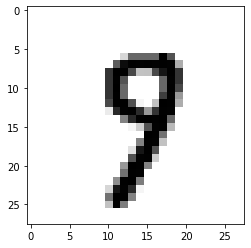

In [16]:
digit = train_images[1250]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

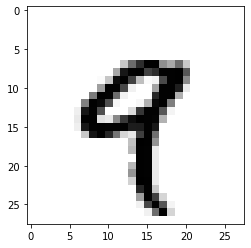

In [17]:
digit = train_images[4]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

## densely connected network

In [21]:
train_images_v0 = train_images.reshape((60000, 28*28)) # flatten 2D 28x28 images to 784x1 array
train_images_v0 = train_images_v0.astype('float32') / 255 # scale the values in 0-1 interval

test_images_v0 = test_images.reshape((10000, 28*28))
test_images_v0 = test_images_v0.astype('float32') / 255

train_labels_v0 = to_categorical(train_labels)
test_labels_v0 = to_categorical(test_labels)

In [42]:
print(train_labels[0])
print(train_labels_v0[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [40]:
print("train_labels:\t", train_labels.shape)
print("train_labels_v0:\t", train_labels_v0.shape)
print("train_images:\t", train_images.shape)
print("train_images_v0:\t", train_images_v0.shape)
print("train_images[0]:\t", train_images[0].shape)
print("train_images_v0[0]:\t", train_images_v0[0].shape)

train_labels:	 (60000,)
train_labels_v0:	 (60000, 10)
train_images:	 (60000, 28, 28)
train_images_v0:	 (60000, 784)
train_images[0]:	 (28, 28)
train_images_v0[0]:	 (784,)


In [31]:
print(type(train_images))
print(type(train_images_v0))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


In [22]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_images_v0, train_labels_v0, epochs=5, batch_size=128)

Epoch 1/5
60000/60000 [==============================] - 3s 47us/step - loss: 0.2542 - accuracy: 0.9262
Epoch 2/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.1038 - accuracy: 0.9696
Epoch 3/5
60000/60000 [==============================] - 3s 45us/step - loss: 0.0692 - accuracy: 0.9791
Epoch 4/5
60000/60000 [==============================] - 3s 46us/step - loss: 0.0495 - accuracy: 0.9850
Epoch 5/5
60000/60000 [==============================] - 3s 46us/step - loss: 0.0370 - accuracy: 0.9891


In [24]:
test_loss, test_acc = model.evaluate(test_images_v0, test_labels_v0)
print("test_loss: %s, test_acc: %s" %(np.round(test_loss,3), np.round(test_acc,3)))

10000/10000 [==============================] - 0s 31us/step
test_loss: 0.069, test_acc: 0.979


## convnet

In [44]:
train_images_v1 = train_images.reshape((60000, 28, 28, 1)) # convert 2D 28x28 images to (28x28x1) tensors
train_images_v1 = train_images_v1.astype('float32') / 255 # scale the values in 0-1 interval

test_images_v1 = test_images.reshape((10000, 28, 28, 1))
test_images_v1 = test_images_v1.astype('float32') / 255

train_labels_v1 = to_categorical(train_labels)
test_labels_v1 = to_categorical(test_labels)

In [47]:
print(np.max(train_images[0]))
print(np.max(train_images_v1[0])) # the values ranges between 0-1 (i.e. normalized)

255
1.0


In [48]:
print("train_labels:\t", train_labels.shape)
print("train_labels_v1:\t", train_labels_v1.shape)
print("train_images:\t", train_images.shape)
print("train_images_v1:\t", train_images_v1.shape)
print("train_images[0]:\t", train_images[0].shape)
print("train_images_v1[0]:\t", train_images_v1[0].shape)

train_labels:	 (60000,)
train_labels_v1:	 (60000, 10)
train_images:	 (60000, 28, 28)
train_images_v1:	 (60000, 28, 28, 1)
train_images[0]:	 (28, 28)
train_images_v1[0]:	 (28, 28, 1)


In [49]:
print(type(train_images))
print(type(train_images_v1))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


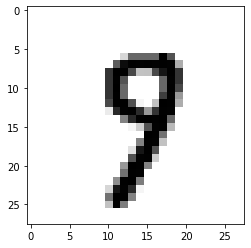

In [51]:
digit = train_images_v1[1250][:,:,0]

plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

## building convnet model
- a convnet takes as input tensors of shape *(image_height, image_width, image_channels)* -- not including the batch dimension
- configure the convnet to process inputs of size (28, 28, 1), which is the format of MNIST images
    - do this by passing the argument input_shape=(28, 28, 1) to the first layer
- output of every Conv2D and MaxPooling2D layer is a 3D tensor of shape (height, width, channels).
- the width and height dimensions tend to shrink as you go deeper in the network
- The number of channels is controlled by the first argument passed to the Conv2D layers (32 or 64)
- Adding a classifier on top of the convnet:
    - last output tensor of shape (3,3,64) are fed into a densely connected classifier network (i.e. to a stack of dense layers)
    - first 3D outputs need to be flattened into 1D, and then add a few dense layers on top
- Densely connected layer vs convolution layer:
    - Dense layers learn global patterns in their input feature space, whereas convolution layers learn local patterns
        - the patterns learned by convolution layers are translation invariant
        - convolution layers can learn spatial hierarchies of patterns: a first convolution layer will learn small local patterns such as edges, a second convolution layer will learn larger patterns made of the features of the first layers and son on. This allows convnets to efficiently learn increasingly complex and abstract visual concepts (because visual world is fundamentally spatially hierarchical)
- Convolutions operate over 3D tensors, called feature maps, with two spatial axes (height and width) as well as a depth axis (also called the channels axis)
    - For an RGB image, the dimension of the depth axis is 3, because the image has three color channels: red, green, and blue. For a black-and-white picture, like the MNIST digits, the depth is 1 (levels of gray)

In [69]:
model = models.Sequential()

# Conv2D(output_depth, (window_height, window_width))
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# model.add(layers.Conv2D(32, (5, 5), activation='relu', input_shape=(28, 28, 1)))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (5, 5), activation='relu'))
# model.add(layers.MaxPooling2D((2, 2)))
# model.add(layers.Conv2D(64, (3, 3), activation='relu')) # if you put (5,5) conv here, it raises error

# adding a classifier on top of the convnet
# (3, 3, 64) outputs are flattened into vectors of shape (576,) before going through two Dense layers.
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))

# 10-way classification, using a final layer with 10 outputs and a softmax activation
model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_19 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
flatten_6 (Flatten)          (None, 576)               0         
_________________________________________________________________
dense_17 (Dense)             (None, 64)              

In [67]:
model.fit(train_images_v1, train_labels_v1, epochs=5, batch_size=64)

Epoch 1/5
60000/60000 [==============================] - 23s 386us/step - loss: 0.1680 - accuracy: 0.9465
Epoch 2/5
60000/60000 [==============================] - 23s 379us/step - loss: 0.0437 - accuracy: 0.9867
Epoch 3/5
60000/60000 [==============================] - 22s 363us/step - loss: 0.0300 - accuracy: 0.9910
Epoch 4/5
60000/60000 [==============================] - 22s 363us/step - loss: 0.0229 - accuracy: 0.9931
Epoch 5/5
60000/60000 [==============================] - 21s 356us/step - loss: 0.0194 - accuracy: 0.9939


In [68]:
test_loss, test_acc = model.evaluate(test_images_v1, test_labels_v1)
print("test_loss: %s, test_acc: %s" %(np.round(test_loss,3), np.round(test_acc,3)))

10000/10000 [==============================] - 1s 111us/step
test_loss: 0.028, test_acc: 0.992
